In [4]:
import pandas as pd

In [6]:
customer_df = pd.read_json("dim_customer.json")
customer_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [7]:
invoice_df = pd.read_csv("fct_invoice.csv")
invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [15]:
#easy 1. How many unique customers are in the dataset?
invoice_df["customer_id"].nunique()

5191

In [16]:
#easy 2 What are the different categories of products available?
invoice_df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [17]:
#easy 2 How many unique categories are there?
invoice_df["category"].nunique()

8

In [22]:
#easy 3 Which payment method is the most popular?
invoice_df["payment_method"].mode()[0]

'Cash'

In [27]:
#easy 3 How many times was it used?
invoice_df["payment_method"].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [48]:
new_df = pd.read_csv("fct_invoice.csv")
new_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [50]:
new_df["total_sales"] = new_df["quantity"] * new_df["price"]
new_df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [51]:
#medium 1. What are the three most popular categories, by total sales?
new_df.groupby('category')['total_sales'].sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [52]:
customer_df.head(2)

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe


In [53]:
invoice_df.head(2)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total sales,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,5401.53


In [56]:
new_df2 = invoice_df.merge(customer_df, how="left", left_on = 'customer_id', right_on = 'id')
new_df2.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total sales,total_sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,242.40,NaN,Richard,M,1089,Rhodes


In [64]:
#medium 2. What are the total sales attributed to customers over the age of 45?
new_df2[new_df2['age'] > 45]["total_sales"].sum()

82039768.15

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

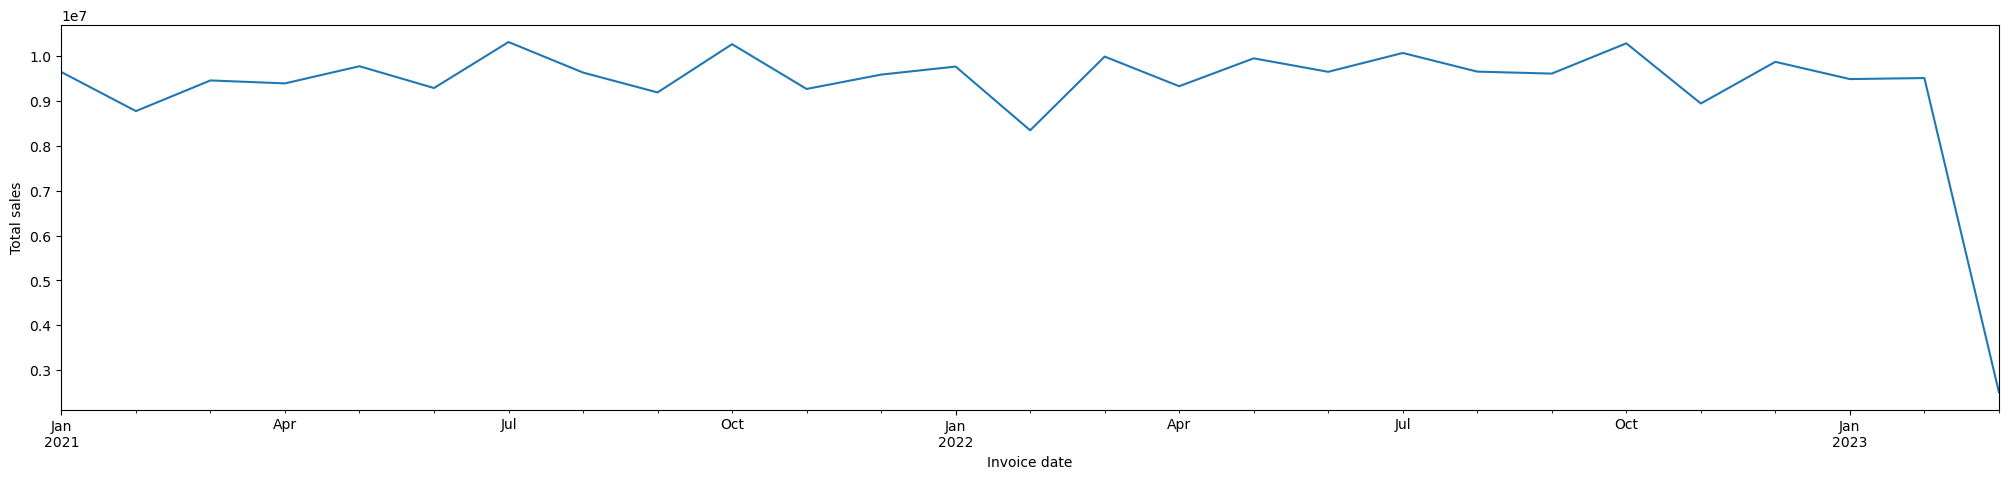

From early January 2021 to early January 2023 in the invoice date, there are only little fluctuations in terms of total sales
It is usually at its peak during the months of July and October
Total sales drops later in 2023


In [177]:
#medium 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?
new_df2['invoice_date'] = pd.to_datetime(new_df2['invoice_date'], format='%d/%m/%y')
grouped = new_df2.groupby(new_df2['invoice_date'].dt.to_period('M'))['total_sales'].sum()
grouped.plot(figsize=(25,5))

plt.xlabel("Invoice date")
plt.ylabel("Total sales")
plt.show()

print("From early January 2021 to early January 2023 in the invoice date, there are only little fluctuations in terms of total sales")
print("It is usually at its peak during the months of July and October")
print("Total sales drops later in 2023")

In [146]:
#hard 1.Create a pivot table showing the breakdown of sales across these dimensions: category, decade age range
new_df2.groupby(['category','age']).count()['total_sales']

category  age 
Books     18.0     44
          19.0     31
          20.0     41
          21.0     31
          22.0     44
                 ... 
Toys      81.0     66
          82.0    103
          83.0     47
          84.0     51
          85.0     68
Name: total_sales, Length: 544, dtype: int64

In [175]:
bins = [10,19,29,39,49,59,69,79,89]
labels = ['10-19', '20-29', '30-39', '40-49','50-59','60-69','70-79','80-89']

new_df2['age_range'] = pd.cut(new_df2['age'], bins=bins, labels=labels)
pd.pivot_table(new_df2, values='total_sales', index='category', columns='age_range', aggfunc='sum', fill_value=0)

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
